In [ ]:
# importing relevant libraries
import numpy as np
import random as rd
from random import randint
import matplotlib.pyplot as plt


In [ ]:
# defining fitness function for the genetic algorithm
def cal_fitness(population):

    fitness = np.empty(population.shape[0])

    # calculating fitness
    for i in range(population.shape[0]):

        # total penaly of this population
        penalty_population= np.logical_not(population[i]).astype(int)
        
        # total value of this population
        total_value = np.sum(population[i] * value) + np.sum(penalty_population * loss)

        # total weight of this population
        total_weight = np.sum(population[i] * weight)

        # if total weight_exceeds knapsack_size, then induce penalty as the bag will be empty
        if total_weight <= knapsack_threshold:
            fitness[i] = total_value
        else :
            fitness[i] = np.sum(loss)
       
    return fitness.astype(int) 


In [ ]:
# get new generation of off springs
def selection(population):

    fitness = cal_fitness(population)
    normalisedFitness = []

    # calculate normalised fitness
    for a in fitness:
      normalisedFitness.append(1/(1 + np.sum(value) - a))
      normalisedFitness[-1] = pow(normalisedFitness[-1], 3)
    
    total_sum = np.sum(normalisedFitness)

    # calculating probability distribution based on normalised fitness
    probability = []
    for a in normalisedFitness:
      probability.append(a/total_sum)
    
    # calculating cummulative probability
    cummulative_probability = []
    prev = 0
    for a in probability:
      cummulative_probability.append(prev + a)
      prev += a
    
    # find next generation using roulette wheel
    newParents = []

    for _ in range(population.shape[0]):
      random = np.random.random()
      index = 0

      for a in cummulative_probability:
        if random > a:
          index += 1
      
      newParents.append(population[index])

    return np.array(newParents)

In [ ]:
# cross over in the population
def crossover(population, threshold):
  size = population.shape[0]
  participants = []

  # find who will be participating in the crossover
  for i in range(size):
    if np.random.random() <= threshold:
      participants.append(i)

  newPopulation = population.copy()

  for i in range(len(participants)):

    # choosing two parents to cross over
    partner1 = participants[i]
    partner2 = participants[(i+1)%len(participants)]

    # crossing over from the randomly generated place
    pos = np.random.randint(population.shape[1] - 1)
    temp = population[partner1][0:pos + 1].tolist() + population[partner2][pos + 1:].tolist() 
    newPopulation[partner1] = np.array(temp)
  
  return newPopulation

In [ ]:
# function to add mutation in the offspring
def mutation(population, rate):

  # determining the amount of mutation
  total_gene = population.shape[0] * population.shape[1]
  total_mutations = int(total_gene * rate)

  # find all the indices who will be mutated
  mutation_indices = np.random.randint(total_gene, size = total_mutations )
  mutation_indices = mutation_indices.tolist()
  mutation_indices.sort()
  
  # mutate all the genes are in the mutation indices
  cnt = 0
  for i in range(len(population)):
    for j in range(len(population[i])):
      if len(mutation_indices) and cnt == mutation_indices[0]:
        population[i][j] = (population[i][j] + 1) % 2
        mutation_indices.pop(0) 
      cnt += 1
  
  return population

In [ ]:
# optimizing the initial population
def optimize(initial_population, iterations = 100, crossover_threshold = .5, mutation_rate = .1):
  population = initial_population

  # storing best chromosome
  history = []
  best_gene_score = -1
  best_gene = []

  # creating new generations
  for _ in range(iterations):
    population = selection(population)
    fitness = cal_fitness(population)  

    # storing history and storing best chromosome
    history.append(fitness)
    temp = max(fitness)
    if temp > best_gene_score:
      best_gene = population[fitness.tolist().index(temp)]
      best_gene_score = temp
    
    population = crossover(population, crossover_threshold)
    population = mutation(population, mutation_rate)


  return history, best_gene


In [ ]:
def print_best_gene_details(best_gene):
  print('\nSelected items that will maximize the knapsack without breaking it:\n')
  for i in range(len(best_gene)):
    if best_gene[i] != 0:
      print('{}: {} \n'.format(i+1, item_name[i]))

In [ ]:
# plotting graph of the entire generation history
def plot_graph(history): 
  fnm = [np.mean(a) for a in np.array(history) ]
  fnmax = [np.max(a) for a  in np.array(history)]

  plt.plot(list(range(100)), fnm, label="mean fitness")
  plt.plot(list(range(100)), fnmax, label="max fitness")
  plt.legend()
  plt.title('Fitness through the generations')
  plt.xlabel('Generations')
  plt.ylabel('Fitness')
  plt.show()


## Taking Inputs

In [ ]:
# initializing input storages
choice  = int(input("Select 0 for default list or 1 for custom list "))
item_name = []
weight = []
value = []
loss = []
knapsack_threshold = 40 

# taking inputs
if (choice):
  n = int(input("Enter number of items: "))
  knapsack_threshold = int(input("Enter knapsack Threshold: "))
  for i in range(n):
    item_name.append(input("Enter item name : "))
    weight.append(int(input("Enter weight : ")))
    value.append(int(input("Enter survival value : ")))
    loss.append(int(input("Enter penalty points : ")))    
else :
  item_name = ["Sleeping Bag", "Rope", "Bottle", "Torch+Battery", "Glucose", "Pocket Knife", "Umbrella" ]
  weight = [30,10,5,15,5,10,20]
  value = [20,10,20,25,30,15,10]
  loss = [0,0,0, -20, 0, -10, 0]

# converting into numpy array
item_name = np.array(item_name)
weight = np.array(weight)
value = np.array(value)

# displaying input
print('\nThe list is as follows:\n')

print('{0:25}\t{1:6}\t{2:6}\t{3:6}\n'.format("Item Name" ,   "Weight",    "Value", "Loss"))

for i in range(item_name.shape[0]):
    print('{0:25}\t{1:5}\t{2:5}\t{3:5}\n'.format(item_name[i], weight[i], value[i], loss[i]))

Select 0 for default list or 1 for custom list 0

The list is as follows:

Item Name                	Weight	Value 	Loss  

Sleeping Bag             	   30	   20	    0

Rope                     	   10	   10	    0

Bottle                   	    5	   20	    0

Torch+Battery            	   15	   25	  -20

Glucose                  	    5	   30	    0

Pocket Knife             	   10	   15	  -10

Umbrella                 	   20	   10	    0



In [ ]:
# initiazing starting population

solutions_per_pop = 8 # number of genes
pop_size = (solutions_per_pop, item_name.shape[0]) 
initial_population = np.random.randint(2, size = pop_size).astype(int) # randomly generating initial population

print('Population size = {}'.format(pop_size))
print('Initial population: \n{}'.format(initial_population))

Population size = (8, 7)
Initial population: 
[[1 1 1 1 0 0 1]
 [1 1 1 0 0 1 0]
 [0 1 0 1 0 1 1]
 [1 1 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 1 1 1 0 1]
 [0 0 0 0 0 1 0]
 [1 1 0 1 1 0 1]]


In [ ]:
# running the genetic algorithm on initial_population
# can play with it by changing parameters
history, best_gene = optimize(initial_population, iterations = 100, crossover_threshold = .5, mutation_rate = .1)


Selected items that will maximize the knapsack without breaking it:

3: Bottle 

4: Torch+Battery 

5: Glucose 

6: Pocket Knife 



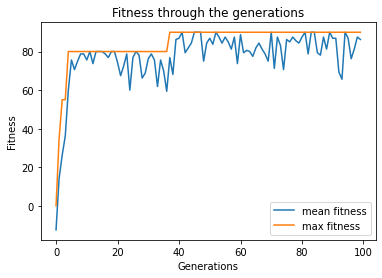

In [ ]:
# display results
print_best_gene_details(best_gene)
plot_graph(history)

## Representing the chromosomes :
Each chromosome is represented by an array of size equal to the number of items. The respective position is set to 1 or 0 as per there presence in the knapsack. The below code will show the representation of the chromosomes.

In [ ]:
example_chromosome = np.random.randint(2, size = (1,item_name.shape[0]))
print(example_chromosome)

[[1 1 1 1 0 1 0]]


##Fitness function: 
Given the chromosome is valid i.e the sum of weights of all the items considered ( they are those indices with value stored 1 ) is less than the knapsack threshold, the fitness function  is equal to the sum of the value of considered items and the penalty points of those not considered. If the weight is more than the threshold, only the sum of the penalty points is returned.

In [ ]:
example_population_ = np.random.randint(2, size = pop_size)
cal_fitness(example_population_)

array([ 20, -30,  20, -30,   0,  70, -30, -30])

## Selection:
First the population fitness is evaluated and then we intend on nomrmalising it. First the value of 1/(1+(maximum value that can be incurred) - fitness) is taken. ( If fitness is negative the denominator will become bigger, thus reducing the value of the fraction. Moreover, the fitness value cannot be more than the maximum obtainable value, thus preventing the fraction from being negative). All these values are added to find the total sum. Then based on this probability is calculated by dividing the normalised fitness by the sum obtained. After this the cumulative probabilty is calculated. N random numbers are generated (between 0 to 1) and compared to the the cumulative probabiltites of each chromosome. According to the range within which the random number falls the new population of chromosomes is selected.

In [ ]:
print(example_population_, '\n')
print('offsprings after selection')
selection(example_population_).tolist()

[[0 0 1 0 1 0 0]
 [1 1 1 1 1 0 0]
 [0 1 0 0 1 0 1]
 [0 1 0 1 1 1 1]
 [0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 1 0 1 0]
 [1 1 1 0 1 1 0]] 

offsprings after selection


[[0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 1, 0]]

## Crossover:
N random numbers are generated where N is the number of chromosomes in a generation. Each number is then compared with the threshold value of crossover. If the ith number is less than or equal to the threshold, the corresponding chromosome (ith chromosome) is selected as a participant in the process of crossover. The participating chromosome are then crossed over in a cyclic manner and position of crossover is decided by generating a random number which falls between its length.

In [ ]:
print(example_population_, '\n')
print("After crossover : ")
crossover(example_population_, 0.5).tolist()

[[0 0 1 0 1 0 0]
 [1 1 1 1 1 0 0]
 [0 1 0 0 1 0 1]
 [0 1 0 1 1 1 1]
 [0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 1 0 1 0]
 [1 1 1 0 1 1 0]] 

After crossover : 


[[0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 0, 0]]

## Mutation:
A certain mutation rate is taken and then multiplied to the total number of genes ( number of chromosomes * length of chromosomes). The floor of this product determines the number of genes that will be mutated (say X). Now X random numbers are generated within the range of total number of genes. The genes corresponding to these numbers are then selected and their values flipped ( 1 to 0 or vice versa). The resulting population has thus mutated. 

In [ ]:
print(example_population_, '\n')
print("After mutation : ")
mutation(example_population_, 0.1).tolist()

[[0 0 1 0 1 0 0]
 [1 1 1 1 1 0 0]
 [0 1 0 0 1 0 1]
 [0 1 0 1 1 1 1]
 [0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 1 0 1 0]
 [1 1 1 0 1 1 0]] 

After mutation : 


[[0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 1, 0]]